# Neural Networks

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juanesgutiz19/ia-project-bankruptcy-prediction/blob/master/07%20-%20Neural%20Network.ipynb)

In [155]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_absolute_error, accuracy_score, mean_squared_error, precision_score, f1_score,recall_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import itertools
import tensorflow.keras.backend as K
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import re
import tensorflow as tf
import keras_tuner as kt
import keras

In [2]:
df = pd.read_parquet('data/clean_data.parquet')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,...,Working Capital/Equity_Low,Working Capital/Equity_Medium,Cash Flow to Sales_High,Cash Flow to Sales_Low,Cash Flow to Liability_High,Cash Flow to Liability_Low,Cash Flow to Liability_Medium,CFO to Assets_High,CFO to Assets_Low,CFO to Assets_Medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


In [3]:
df.columns = df.columns.str.lstrip()

In [4]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in df.columns]
df.head()

,bankrupt?,r_o_a(_c) before interest and depreciation before interest,r_o_a(_a) before interest and % after tax,operating _gross _margin,operating _profit _rate,pre-tax net _interest _rate,after-tax net _interest _rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating _expense _rate,...,working _capital/_equity__low,working _capital/_equity__medium,cash _flow to _sales__high,cash _flow to _sales__low,cash _flow to _liability__high,cash _flow to _liability__low,cash _flow to _liability__medium,c_f_o to _assets__high,c_f_o to _assets__low,c_f_o to _assets__medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


In [5]:
X = df.drop('bankrupt?', axis=1).values
Y = df['bankrupt?'].values
print (X.shape , Y.shape)

(6819, 114) (6819,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(4773, 114)
(2046, 114)


In [7]:
  #NORMALIZAR
def calcularMatrizCF(matrix,titulo):
    a = (matrix[0,0] +  matrix[0,1])
    b = (matrix[1,0] +  matrix[1,1])
    matrix[0,0] =  matrix[0,0] / a
    matrix[0,1] =  matrix[0,1] / a
    matrix[1,0] =  matrix[1,0] / b
    matrix[1,1] =  matrix[1,1] / b
    #MATRIZ DE CONFUSION
    sns.heatmap(matrix,annot=True)
    plt.xlabel('Label Pred')
    plt.ylabel('Label True')
    plt.title(titulo)
    print(matrix)

In [8]:
from tensorflow.keras import Input, Model

In [33]:
from tensorflow.keras.layers import Dense, Activation, Dropout

In [58]:
import tensorflow_addons as tfa

In [121]:
def simple_model():
    input_data = Input(shape=(X_train.shape[1],))
    x_1 = Dense(128,'relu')(input_data)
    x_2 = Dropout(0.3)(x_1)
    x_3 = Dense(64,'relu')(x_2)
    x_3 = Dense(32,'relu')(x_2)
    x_3 = Dense(16,'relu')(x_2)
    x_3 = Dropout(0.3)(x_3)
    x_4 = Dense(1,'sigmoid')(x_3)
    model = Model(inputs=input_data, outputs=x_4, name='Simple_Model')   
    return model

In [122]:
model = simple_model()
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Recall()])

In [123]:
model.fit(X_train, y_train, batch_size=256, epochs=30, validation_split=0.2)

Epoch 1/30
15/15 [==============================] - 1s 46ms/step - loss: 0.0000e+00 - binary_accuracy: 0.5427 - recall_15: 0.3333 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.9675 - val_recall_15: 0.0000e+00
Epoch 2/30
15/15 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - binary_accuracy: 0.9508 - recall_15: 0.0081 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.9675 - val_recall_15: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - binary_accuracy: 0.9675 - recall_15: 0.0081 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.9675 - val_recall_15: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - binary_accuracy: 0.9675 - recall_15: 0.0000e+00 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.9675 - val_recall_15: 0.0000e+00
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - binary_accuracy: 0.9678 - recall_15: 0.0000e+00 - val_loss: 0.0000e+00

In [124]:
y_pred = model.predict(X_test)

64/64 [==============================] - 0s 708us/step


In [125]:
y_pred.mean()

0.0

In [126]:
def calcularMatrizCF(matrix,titulo):
    a = (matrix[0,0] +  matrix[0,1])
    b = (matrix[1,0] +  matrix[1,1])
    matrix[0,0] =  matrix[0,0] / a
    matrix[0,1] =  matrix[0,1] / a
    matrix[1,0] =  matrix[1,0] / b
    matrix[1,1] =  matrix[1,1] / b
    #MATRIZ DE CONFUSION
    sns.heatmap(matrix,annot=True)
    plt.xlabel('Label Pred')
    plt.ylabel('Label True')
    plt.title(titulo)
    print(matrix)

In [191]:
conf_matrix = confusion_matrix(y_test,y_pred,normalize='true')

[[1. 0.]
 [1. 0.]]


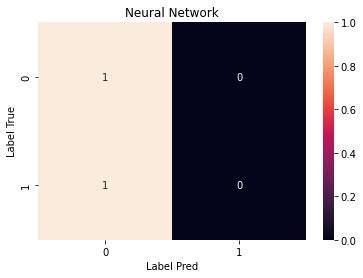

In [192]:
calcularMatrizCF(conf_matrix,"Neural Network")

In [132]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import keras_tuner


In [164]:
class CVTuner(keras_tuner.engine.tuner.Tuner): 

    def __init__(self, data_cv, goal, hypermodel,oracle, proj_name, directory, overwrite):    
                self.data_cv = data_cv  
                self.goal = goal
                self.trial_scores = []
                keras_tuner.engine.tuner.Tuner.__init__(self, hypermodel=hypermodel, oracle=oracle, project_name = proj_name,
                                                       directory=directory, overwrite=overwrite)


    def run_trial(self, trial, x, y, batch_size=32, epochs=1):
    
        val_f1 = []
        val_auc= []
        val_acc = []

        for train_indices, test_indices in self.data_cv.split(x, y):
            
            x_train, x_test = x[train_indices], x[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            model = self.hypermodel.build(trial.hyperparameters)  

            callback=[keras.callbacks.EarlyStopping(monitor=self.goal, mode='max', patience=2)]

            model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,callbacks = callback)
            y_pred = model.predict(x_test)
            f1 = model.evaluate(x_test, y_test)
            auc = roc_auc_score(y_test,y_pred, average='weighted')
            acc = accuracy_score(y_test,np.round(y_pred))
            val_auc.append(auc)
            val_f1.append(f1)
            val_acc.append(acc)
        
        val_f1 = np.array(val_f1)[:,1]
        val_auc = np.array(val_auc)
        val_acc = np.array(val_acc)
        self.trial_scores.append({'id':trial.trial_id,
                                'hyperparams':trial.hyperparameters.values,
                                'f1': np.mean(val_f1),
                                'f1_std': np.std(val_f1),
                                'Roc_auc': np.mean(val_auc),
                                'Roc_auc_std': np.std(val_auc),
                                'Accuracy': np.mean(val_acc),
                                'Accuracy_std': np.std(val_acc)
                                 })

        self.oracle.update_trial(trial.trial_id, {self.goal: np.mean(val_f1)})


In [171]:
def build_model_Simple(hp):
    
    input_data = Input(shape=(X_train.shape[1],))
    x_1 = Dense(hp.Int('input_units',min_value=100,max_value=200,step=20),'relu')(input_data)
    x_2 = Dropout(0.3)(x_1)
    x_3 = Dense(hp.Int('Dense_1',min_value=50,max_value=100,step=20),'relu')(x_2)
    x_3 = Dense(hp.Int('Dense_2',min_value=30,max_value=50,step=5),'relu')(x_2)
    x_3 = Dense(hp.Int('Dense_3',min_value=10,max_value=30,step=5),'relu')(x_2)
    x_3 = Dropout(0.3)(x_3)
    x_4 = Dense(1,'sigmoid')(x_3)
    model = Model(inputs=input_data, outputs=x_4, name='Simple_Model')   
    opt = tf.keras.optimizers.Nadam(clipnorm = 1.0)#,global_clipnorm=1)
    model.compile(optimizer=opt, loss="binary_crossentropy",metrics=[f1]) #

    return model

In [172]:
from skmultilearn.model_selection import IterativeStratification

In [173]:
cv = StratifiedKFold(n_splits=5)

In [174]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [193]:
tuner_Simple = CVTuner(
                    data_cv= cv,
                    goal = 'f1',
                    hypermodel=build_model_Simple,
                    oracle=keras_tuner.oracles.BayesianOptimizationOracle(
                    objective=kt.Objective('f1',direction = "max"),
                        max_trials=20                  
                    ),
                    directory='./experiments/',
                    proj_name = 'neuralnets',
                    overwrite=True
                    )
tuner_Simple.search(X_train, y_train, 128, epochs=15)

Trial 20 Complete [00h 00m 08s]
f1: 0.0

Best f1 So Far: 0.015735597908496858
Total elapsed time: 00h 02m 56s
INFO:tensorflow:Oracle triggered exit


In [179]:
df_results = pd.DataFrame(tuner_Simple.trial_scores)

In [180]:
df_results

,id,hyperparams,f1,f1_std,Roc_auc,Roc_auc_std,Accuracy,Accuracy_std
0,00,"{'input_units': 100, 'Dense_1': 90, 'Dense_2':...",0.000000,0.000000,0.527138,0.060855,0.967526,0.000652
1,01,"{'input_units': 180, 'Dense_1': 90, 'Dense_2':...",0.000000,0.000000,0.487715,0.024270,0.967735,0.000409
2,02,"{'input_units': 200, 'Dense_1': 70, 'Dense_2':...",0.000000,0.000000,0.510502,0.004207,0.967735,0.000409
3,03,"{'input_units': 140, 'Dense_1': 90, 'Dense_2':...",0.000000,0.000000,0.511607,0.004498,0.967526,0.000652
4,04,"{'input_units': 200, 'Dense_1': 90, 'Dense_2':...",0.000000,0.000000,0.518467,0.017817,0.967526,0.000017
5,05,"{'input_units': 140, 'Dense_1': 70, 'Dense_2':...",0.000000,0.000000,0.481955,0.057442,0.965220,0.004622
6,06,"{'input_units': 140, 'Dense_1': 90, 'Dense_2':...",0.000000,0.000000,0.518647,0.007256,0.967316,0.000412
7,07,"{'input_units': 120, 'Dense_1': 90, 'Dense_2':...",0.014889,0.018400,0.509903,0.024763,0.954960,0.026176
8,08,"{'input_units': 120, 'Dense_1': 50, 'Dense_2':...",0.004889,0.009778,0.540561,0.035965,0.965849,0.001710
9,09,"{'input_units': 160, 'Dense_1': 70, 'Dense_2':...",0.000000,0.000000,0.504295,0.021184,0.967526,0.000017


In [183]:
df_results.loc[13]['hyperparams']

{'input_units': 100, 'Dense_1': 90, 'Dense_2': 40, 'Dense_3': 15}

In [185]:
def best_model():
    input_data = Input(shape=(X_train.shape[1],))
    x_1 = Dense(100,'relu')(input_data)
    x_2 = Dropout(0.3)(x_1)
    x_3 = Dense(90,'relu')(x_2)
    x_3 = Dense(40,'relu')(x_2)
    x_3 = Dense(15,'relu')(x_2)
    x_3 = Dropout(0.3)(x_3)
    x_4 = Dense(1,'sigmoid')(x_3)
    model = Model(inputs=input_data, outputs=x_4, name='Simple_Model')
    opt = tf.keras.optimizers.Nadam(clipnorm = 1.0)#,global_clipnorm=1)
    model.compile(optimizer=opt, loss="binary_crossentropy",metrics=[f1]) #
    return model

In [186]:
best_model = best_model()

In [187]:
best_model.fit(X_train, y_train, batch_size=256, epochs=30, validation_split=0.2)

Epoch 1/30
15/15 [==============================] - 1s 11ms/step - loss: 170940576.0000 - f1: 0.0655 - val_loss: 32606056.0000 - val_f1: 0.0000e+00
Epoch 2/30
15/15 [==============================] - 0s 3ms/step - loss: 41745868.0000 - f1: 0.0628 - val_loss: 16462294.0000 - val_f1: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 0s 3ms/step - loss: 21313066.0000 - f1: 0.0368 - val_loss: 4203353.0000 - val_f1: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 6701369.5000 - f1: 0.0427 - val_loss: 986089.8750 - val_f1: 0.0000e+00
Epoch 5/30
15/15 [==============================] - 0s 3ms/step - loss: 2709554.7500 - f1: 0.0205 - val_loss: 177269.9844 - val_f1: 0.0000e+00
Epoch 6/30
15/15 [==============================] - 0s 3ms/step - loss: 924917.7500 - f1: 0.0000e+00 - val_loss: 51754.6289 - val_f1: 0.0000e+00
Epoch 7/30
15/15 [==============================] - 0s 3ms/step - loss: 322359.1562 - f1: 0.0000e+00 - val_loss: 151.4682 - val_f1

In [188]:
y_pred = model.predict(X_test)

64/64 [==============================] - 0s 712us/step


In [189]:
conf_matrix = confusion_matrix(y_test,y_pred)

[[1 0]
 [1 0]]


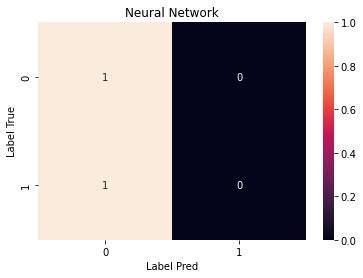

In [190]:
calcularMatrizCF(conf_matrix,"Neural Network")